<div style="font-size:18pt; padding-top:20px; text-align:center">ЗАДАНИЕ. <b>Классификация текстовых данных</b> </div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin.study@yandex.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Варианты</a></li>
        <li><a href="#2">Задание</a></li>
    </ol>
</div>

<p>Подключение стилей оформления</p>

In [1]:
%%html
<link href="css/style.css" rel="stylesheet" type="text/css">

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Варианты</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Чтобы узнать свой вариант, введите Вашу фамилию в соответвующее поле ниже и запустите ячейку:</p>

In [2]:
surname = "Корюкин" # Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 3 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  2


<div class="msg-block msg-warning">
  <p class="msg-text-warn">Варианты могут не совпадать с последующими ДЗ</p>
</div>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Задание</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<div class="msg-block msg-imp">
  <div class="msg-text-imp">
      <p>СРОК СДАЧИ: до <b>-</b></p>
      <p style="margin:0px">ПОСЛЕ СРОКА: первая неделя <b>-</b>, вторая неделя и далее до конца модуля <b>-</b>
      </p>
  </div>
</div>

<p><b>Варианты</b></p>

<ol>
    <li>
        Набор электронных сообщений (emails) - <b>спам/не спам</b> - <a href="http://csmining.org/index.php/spam-email-datasets-.html">источник</a> - файл c данными: <b>data/emails.tsv</b>
    </li>
    <li>
        Набор SMS сообщений (sms) - <b>спам/не спам</b> - <a href="https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection">источник</a> - файл c данными: <b>data/SMSSpamCollection</b>
    </li>
    <li>Набор рецензий на фильмы (reviews) - <b>positive/negative</b> - <a href="http://www.cs.cornell.edu/people/pabo/movie-review-data/">источник</a> - файл c данными: <b>data/reviews.tsv</b></li>
</ol>

<p><b>Задача 1.</b> Классификация текстовых сообщений <b><i>(2 балла)</i></b></p>

<ol>
    <li>Загрузите исходные данные</li>
    <li>Разбейте загруженные данные на обучающее (train) и тестовое подможества (test)</li>
    <li>Переведите текстовые данные в векторный вид. Для этого воcпользуйтесь средствами sklearn для конвертации текста в векторы TF-IDF (настроить на обучающем подмножестве, n-gram=1, слова в нижний регистр)</li>
    <li>Постройте на обучающем подмножестве следующие модели классификации:
        <ul>
            <li>K-ближайших соседей ($n=5$)</li>
            <li>Логистическая регрессия ($C=1$)</li>
            <li>Наивный Байес: модель Бернулли ($\alpha=1$)</li> 
            <li>Наивный Байес: мультиномиальная модель ($\alpha=1$)</li> 
        </ul>
    </li>
    <li>Определите качество классификации на тестовом подмножестве (Accuracy, R, P, F1)</li>
    <li>Определите с помощью timeit время обучения и предсказания (на тестовом подмножестве) </li>
</ol>

In [3]:
# Использовать следующие параметры

# для всех объектов/методов/моделей
# random_state = 123  

# Параметры логистической регрессии
# penalty="l2", fit_intercept=True, max_iter=100, C=1, solver="lbfgs", random_state=12345

Использованные библиотеки и настройки тетради

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import pandas as pd

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

Решение

In [5]:
# Задача 1.1
# Загрузите исходные данные

file = open("A3_Text_Classification/SMSSpamCollection", encoding="utf-8")
docs = file.readlines()

docs[0:5]

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n',
 'ham\tOk lar... Joking wif u oni...\n',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n",
 'ham\tU dun say so early hor... U c already then say...\n',
 "ham\tNah I don't think he goes to usf, he lives around here though\n"]

In [6]:
# Задача 1.2
# Разбейте загруженные данные на обучающее (train) и тестовое подможества (test)

# Делим данные на два списка: список сообщений и список классов, элементы которого описывают класс сообщений соотвественно
sms_data = []
sms_class = []
for doc in docs:
    if doc[:3] == 'ham':
        sms_class.append(doc[:3])
        sms_data.append(doc[4:-1])
    else:
        sms_class.append(doc[:4])
        sms_data.append(doc[5:-1])

In [7]:
sms_data[0:5]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though"]

In [8]:
sms_class[0:5]

['ham', 'ham', 'spam', 'ham', 'ham']

In [9]:
# Разбиваем данные на обучающее (train) и тестовое подможества (test)
x_train, x_test, y_train, y_test = train_test_split(sms_data, sms_class, test_size=0.2, random_state = 123)

In [10]:
# Задача 1.3
# Переведите текстовые данные в векторный вид. 
# Для этого воcпользуйтесь средствами sklearn для конвертации текста в векторы TF-IDF 
# (настроить на обучающем подмножестве, n-gram=1, слова в нижний регистр)

vectorizer = TfidfVectorizer(lowercase=True, stop_words=None, 
                             use_idf=True, ngram_range=(1,1),
                             smooth_idf=False)        

# Преобразуем в векторы TF-IDF количества вхождения слов
tfidf_train_vectors = vectorizer.fit_transform(x_train)
tfidf_test_vectors = vectorizer.transform(x_test)

In [11]:
# Для модели Бернулли необходим бинарный вектор вхождений
count_vectorizer = CountVectorizer(analyzer="word", ngram_range=(1,1),
                                   stop_words=None, lowercase=True,
                                   binary=True, strip_accents=None)

binary_train_vectors = count_vectorizer.fit_transform(x_train)
binary_test_vectors = count_vectorizer.transform(x_test)

In [12]:
# Задача 1.4
# Постройте на обучающем подмножестве следующие модели классификации:
# K-ближайших соседей (n=5)
# Логистическая регрессия (C=1)
# Наивный Байес: модель Бернулли (α=1)
# Наивный Байес: мультиномиальная модель (α=1)

knn_model = KNeighborsClassifier(n_neighbors=5)
logr_model = LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1,
                                solver="lbfgs", random_state=12345)
bernNB_model = BernoulliNB(alpha=1, binarize=None)
multNB_model = MultinomialNB(alpha=1)

In [13]:
# Задача 1.5
# Определите качество классификации на тестовом подмножестве (Accuracy, R, P, F1)

# Для сокращения количества повторяющегося кода опишем функции

def quality_calculate(model, test_vectors, y_test, pos_label_option):
    
    y_pred = model.predict(test_vectors)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label = pos_label_option)
    recall = recall_score(y_test, y_pred, pos_label = pos_label_option)
    f1 = f1_score(y_test, y_pred, pos_label = pos_label_option)

    return accuracy, precision, recall, f1

def quality_report(title = '', accuracy = 0, precision = 0, recall = 0 , f1 = 0):
    
    print(title)
    print('Доля верных классификаций: ', round(accuracy,4))
    print('Точность: ', round(precision,4), '|', 'Полнота: ', round(recall,4), '|', 'F мера: ', round(f1,4), '\n')

In [14]:
# Задача 1.6
# Определите с помощью timeit время обучения и предсказания (на тестовом подмножестве)

# Для сокращения количества повторяющегося кода опишем функции

def calculate_time(model, train_vectors, test_vectors, y_train):
    
    time_model_train = %timeit -qo model.fit(train_vectors, y_train)
    time_model_predict = %timeit -qo model.predict(test_vectors)
    
    return time_model_train.average, time_model_predict.average

def calculate_time_report(time_train, time_predict):
    
    print('Время обучения: ', round(time_train, 6), 'секунд')
    print('Время предсказания: ', round(time_predict,6), 'секунд')

In [15]:
# Для выведения результатов задач 1.3-1.6 введем следующую функцию 

def task1_report(model, train_vectors, test_vectors, y_train, y_test, pos_label_option, title):
    
    model.fit(train_vectors, y_train)
    accuracy, precision, recall, f1 = quality_calculate(model, test_vectors, y_test, pos_label_option)
    quality_report(title, accuracy, precision, recall, f1)
    
    time_train, time_predict = calculate_time(model, train_vectors, test_vectors, y_train)
    calculate_time_report(time_train, time_predict)

In [16]:
task1_report(knn_model, tfidf_train_vectors, tfidf_test_vectors, y_train, y_test,
            'spam','Модель к-ближайших соседей')

Модель к-ближайших соседей
Доля верных классификаций:  0.9058
Точность:  1.0 | Полнота:  0.3396 | F мера:  0.507 

Время обучения:  0.000985 секунд
Время предсказания:  0.138326 секунд


In [17]:
task1_report(logr_model, tfidf_train_vectors, tfidf_test_vectors, y_train, y_test,
            'spam','Логистическая регрессия')

Логистическая регрессия
Доля верных классификаций:  0.974
Точность:  0.9851 | Полнота:  0.8302 | F мера:  0.901 

Время обучения:  0.031842 секунд
Время предсказания:  6.8e-05 секунд


In [18]:
task1_report(bernNB_model, binary_train_vectors, binary_test_vectors, y_train, y_test,
            'spam','Наивный байесовский классификатор (модель Бернулли)')

Наивный байесовский классификатор (модель Бернулли)
Доля верных классификаций:  0.9848
Точность:  0.9931 | Полнота:  0.8994 | F мера:  0.9439 

Время обучения:  0.002487 секунд
Время предсказания:  0.000211 секунд


In [19]:
task1_report(multNB_model, tfidf_train_vectors, tfidf_test_vectors, y_train, y_test,
            'spam','Наивный байесовский классификатор (мультиномиальная модель)')

Наивный байесовский классификатор (мультиномиальная модель)
Доля верных классификаций:  0.9641
Точность:  1.0 | Полнота:  0.7484 | F мера:  0.8561 

Время обучения:  0.002586 секунд
Время предсказания:  0.000147 секунд


<p><b>Задача 2.</b> Применение k-folds <b><i>(3 балла)</i></b></p>

<p>Повторите решение задачи 1, но с ипользованием k-folds (k=4) для разделения исходных данных, обучения и тестирования.</p>

In [20]:
# Использовать следующие параметры

# для всех объектов/методов/моделей
# random_state = 123  

# Параметры логистической регрессии
# penalty="l2", fit_intercept=True, max_iter=100, C=1, solver="lbfgs", random_state=12345

Решение

In [21]:
kf = KFold(n_splits = 4, random_state = 123)

In [22]:
# Для усреднения результатов при кросс валидации

def list_average(list_to_find_average):
    
    average = sum(list_to_find_average)/len(list_to_find_average)
    
    return average

In [23]:
# Для выведения результатов задачи 2 введем следующую функцию 

def task2_report(model, X, y, title = '', kf = kf,
                 transformation_type = 'tfidf', pos_label_option = 'spam'):
    
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    time_train_list = []
    time_predict_list = []
    
    for train_index, test_index in kf.split(y):
        x_train = [X[i] for i in train_index]
        x_test = [X[i] for i in test_index]
        y_train = [y[i] for i in train_index]
        y_test = [y[i] for i in test_index]
    
        if transformation_type == 'tfidf':
            train_vectors = vectorizer.fit_transform(x_train)
            test_vectors = vectorizer.transform(x_test)
        elif transformation_type == 'binary':
            train_vectors = count_vectorizer.fit_transform(x_train)
            test_vectors  = count_vectorizer.transform(x_test)  
        else:
            return('Transformation type should be tfidf or binary')

        model.fit(train_vectors,y_train)
        
        m_accuracy, m_precision, m_recall, m_f1 = quality_calculate(model, test_vectors , y_test, pos_label_option)
        accuracy_list.append(m_accuracy)
        precision_list.append(m_precision)
        recall_list.append(m_recall)
        f1_list.append(m_f1)
        
        tr_time, pr_time = calculate_time(model, train_vectors, test_vectors, y_train)
        time_train_list.append(tr_time)
        time_predict_list.append(pr_time)
        
        
    accuracy = list_average(accuracy_list)
    precision = list_average(precision_list)
    recall = list_average(recall_list)
    f1 = list_average(f1_list)
    time_train = list_average(time_train_list)
    time_predict = list_average(time_predict_list)
    
    quality_report(title, accuracy, precision, recall, f1)
    calculate_time_report(time_train, time_predict)

In [24]:
task2_report(knn_model, X = sms_data, y = sms_class, 
             title = 'Модель к-ближайших соседей')

Модель к-ближайших соседей
Доля верных классификаций:  0.92
Точность:  0.9965 | Полнота:  0.4075 | F мера:  0.5489 

Время обучения:  0.000933 секунд
Время предсказания:  0.185629 секунд


In [25]:
task2_report(logr_model, X = sms_data, y = sms_class, 
             title = 'Логистическая регрессия')

Логистическая регрессия
Доля верных классификаций:  0.9688
Точность:  0.9933 | Полнота:  0.7725 | F мера:  0.8691 

Время обучения:  0.038332 секунд
Время предсказания:  7.4e-05 секунд


In [26]:
task2_report(bernNB_model, X = sms_data, y = sms_class,
             title = 'Наивный байесовский классификатор (модель Бернулли)',
             transformation_type = 'binary')

Наивный байесовский классификатор (модель Бернулли)
Доля верных классификаций:  0.9756
Точность:  0.9967 | Полнота:  0.8206 | F мера:  0.9001 

Время обучения:  0.002414 секунд
Время предсказания:  0.000226 секунд


In [27]:
task2_report(multNB_model, X = sms_data, y = sms_class,
             title = 'Наивный байесовский классификатор (мультиномиальная модель)')

Наивный байесовский классификатор (мультиномиальная модель)
Доля верных классификаций:  0.9568
Точность:  1.0 | Полнота:  0.6776 | F мера:  0.8077 

Время обучения:  0.002377 секунд
Время предсказания:  0.000157 секунд


<p><b>Задача 3.</b> Выбор модели <b><i>(5 баллов)</i></b></p>

<p style="padding-left:15px;">1. Используя данные из задачи 1, разбейте обучающее подмножество (train) с использованием k-folds (k=4) <br>
2. Обучите и протестируйте на разбитом обучающем подмножестве классификаторы со следующими параметрами: </p>

<p>K-ближайших соседей</p>

In [28]:
ns = np.arange(1, 150, 20)  # количество соседей

<p>Логистическая регрессия</p>

In [29]:
cs = np.logspace(-2, 10, 8, base=10)  # параметр регуляризации

Наивный Байес: модель Бернулли

In [30]:
alphas = np.logspace(-4, 1, 8, base=10)  # сглаживающий параметр

<p>Наивный Байес: мультиномиальная модель </p>

In [31]:
alphas = np.logspace(-4, 1, 8, base=10)  # сглаживающий параметр

<p style="padding-left:15px;">3. Постройте графики (параметры модели)-(доля правильных классификаций) при обучении и валидации <br>
4. Выберите лучшую модель для каждого метода, используя значение качества классификации (использовать долю правильных классификаций)<br>
5. Выбранные модели обучите на обучающем подмножестве (train) и протестируйте на тестовом (test). Определите время обучения и предсказания (см. задачу 1 п. 6)<br>
6. Повторите шаги 2-4 для n-gram=2 и n-gram=(1,2)<br>
7. Выведите итоговые данные по всем методам для лучших моделей (метод, n-gram, значение параметра модели, время обучения, время предсказания, доля правильных классификаций)<br>
8. Сделайте выводы по полученным результатам (преимущества и недостатки методов)
</p>

In [32]:
# Использовать следующие параметры

# для всех объектов/методов/моделей
# random_state = 123  

# Параметры логистической регрессии
# penalty="l2", fit_intercept=True, max_iter=100, C=1, solver="lbfgs", random_state=12345

Решение

In [33]:
# Для удобства и сокращения количества дублируемого кода задача выполнено не по порядку

In [34]:
# Задача 3.1
# Используя данные из задачи 1, разбейте обучающее подмножество (train) с использованием k-folds (k=4)

# Настройка k-fold
kf = KFold(n_splits = 4, random_state = 123)


# Задача 3.6
# Повторите шаги 2-4 для n-gram=2 и n-gram=(1,2)

# Набор необходимых ngram
ngram_ranges=[(1,1), (1,2), (2,2)]

In [35]:
# Задача 3.4
# Выберите лучшую модель для каждого метода, используя значение качества классификации 
# (использовать долю правильных классификаций)
# Задача 3.5
# Выбранные модели обучите на обучающем подмножестве (train) и протестируйте на тестовом (test). 
# Определите время обучения и предсказания (см. задачу 1 п. 6)

# При помощи GridSearchCV найдем лучшие модели и их параметры, а также данные выведем данные о доле правильных 
# классификаций на всех моделях, что пригодится для построения графиков (задача 3.3)
# Для этого описана следующая функция

def grid_search(x_train, x_test, y_train, params, model, vectorizer, kf):

    pipeline_model = Pipeline([("vectorizer", vectorizer), (list(params.keys())[0][:5], model)])

    grid = GridSearchCV(pipeline_model, params, cv=kf, return_train_score=True)
    grid.fit(x_train, y_train);

    time_best_model_fit = grid.cv_results_['mean_fit_time'][np.where
                                                            (grid.cv_results_['rank_test_score'] == 1)][0]
    
    time_best_model_predict = %timeit -qo grid.best_estimator_.predict(x_test)
    
    best_parameter = grid.best_estimator_['model'].get_params()[list(params.keys())[0][7:]]
    
    best_score = grid.best_score_
    
    return dict(best_parameter=best_parameter, 
                best_score=best_score, 
                time_best_model_fit=time_best_model_fit, 
                time_best_model_predict=time_best_model_predict.average, 
                mean_test_scores=grid.cv_results_['mean_test_score'], 
                mean_train_scores=grid.cv_results_['mean_train_score'])

In [36]:
# Задача 3.3
# Постройте графики (параметры модели)-(доля правильных классификаций) при обучении и валидации

# Введем функцию которая будет выводить графики, а также небольшой отчет

def grid_search_report(results, title, params, ngram_range, x_scale):
    
    print(title,'при ngram_range =',ngram_range,':') 
    print('Время обучения лучшей модели', results['time_best_model_fit'],'с')
    print('Время предсказания лучшей модели', results['time_best_model_predict'],'с')
    print('Лучший параметр модели',list(params.keys())[0][7:], '=', results['best_parameter'])
    print('Наибольшая доля правильных классификаций', results['best_score'])

    plt.figure(figsize=[5, 3])
    plt.title(title + ' при ngram_range =' + str(ngram_range))
    plt.xlabel(list(params.keys())[0][7:])
    plt.xscale(x_scale)
    plt.ylabel("Score")
    plt.plot(params[list(params.keys())[0]], results['mean_train_scores'], "b-o")
    plt.plot(params[list(params.keys())[0]], results['mean_test_scores'], "r-o")

    plt.grid(True)

In [37]:
# Задача 3.6
# Повторите шаги 2-4 для n-gram=2 и n-gram=(1,2)

# Для удобства, для каждой модели сразу будем пересчитывать n-gram
# Необходимые действия в рамках всей задачи 3 описаны в следующей функции

def task3_report(x_train, x_test, y_train, model, params, ngram_ranges, transformation_type, x_scale, kf,
                title):
    
    df_report = pd.DataFrame()
    
    for ngram_range in ngram_ranges:
        
        vectorizer = TfidfVectorizer(lowercase=True, stop_words=None, 
                                     use_idf=True, ngram_range=ngram_range,
                                     smooth_idf=False)   
        count_vectorizer = CountVectorizer(analyzer="word", ngram_range=ngram_range,
                                   stop_words=None, lowercase=True,
                                   binary=True, strip_accents=None)
        
        if transformation_type == 'tfidf': 
            vectorizer_type = vectorizer
        elif transformation_type == 'binary': 
            vectorizer_type = count_vectorizer
        else:
            return('Transformation type should be tfidf or binary')
        
        results = grid_search(x_train, x_test, y_train, params, 
                              model, vectorizer_type, kf)

        grid_search_report(results, title, params, ngram_range, x_scale)
        
        df1 = pd.DataFrame({'Title':[title],
                            'ngram_range':[str(ngram_range)], 
                            'Changing parameter':[list(params.keys())[0][7:]]})
        df2 = pd.Series(results).to_frame().drop(['mean_test_scores', 'mean_train_scores']).T
        df3 = pd.concat([df1, df2], axis=1)
        
        df_report = pd.concat([df_report, df3], axis=0)
        
        print('-------------------------------------')
        
    return df_report

Модель к-ближайших соседей при ngram_range = (1, 1) :
Время обучения лучшей модели 0.06184220314025879 с
Время предсказания лучшей модели 0.18233747142856568 с
Лучший параметр модели n_neighbors = 21
Наибольшая доля правильных классификаций 0.9558196905135681
-------------------------------------
Модель к-ближайших соседей при ngram_range = (1, 2) :
Время обучения лучшей модели 0.14236986637115479 с
Время предсказания лучшей модели 0.1955108585714275 с
Лучший параметр модели n_neighbors = 21
Наибольшая доля правильных классификаций 0.9620991253644315
-------------------------------------
Модель к-ближайших соседей при ngram_range = (2, 2) :
Время обучения лучшей модели 0.10849243402481079 с
Время предсказания лучшей модели 0.11457319857142838 с
Лучший параметр модели n_neighbors = 1
Наибольшая доля правильных классификаций 0.9381027136129177
-------------------------------------


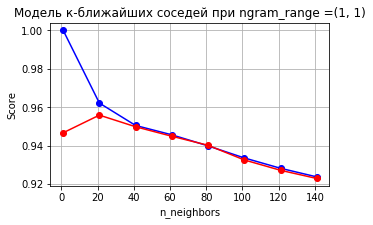

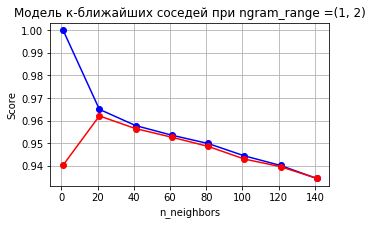

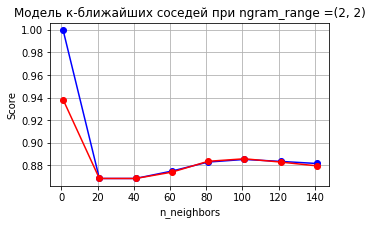

In [38]:
# Задача 2
# Обучите и протестируйте на разбитом обучающем подмножестве классификаторы со следующими параметрами:
# к-ближайших соседей
# ns = np.arange(1, 150, 20)  # количество соседей

ns = {"model__n_neighbors": np.arange(1, 150, 20)}
knn_model = KNeighborsClassifier()

df_knn_results = task3_report(x_train, x_test, y_train, model = knn_model, params = ns, ngram_ranges = ngram_ranges, 
                              transformation_type = 'tfidf', x_scale = 'linear', kf=kf, 
                              title = 'Модель к-ближайших соседей')

Модель логистической регрессии при ngram_range = (1, 1) :
Время обучения лучшей модели 0.15284156799316406 с
Время предсказания лучшей модели 0.012838000714285727 с
Лучший параметр модели C = 71968.56730011514
Наибольшая доля правильных классификаций 0.9843014128728415
-------------------------------------
Модель логистической регрессии при ngram_range = (1, 2) :
Время обучения лучшей модели 0.4980452060699463 с
Время предсказания лучшей модели 0.02792562428571484 с
Лучший параметр модели C = 1389.4954943731361
Наибольшая доля правильных классификаций 0.9854227405247813
-------------------------------------
Модель логистической регрессии при ngram_range = (2, 2) :
Время обучения лучшей модели 0.42611032724380493 с
Время предсказания лучшей модели 0.021430370000000816 с
Лучший параметр модели C = 71968.56730011514
Наибольшая доля правильных классификаций 0.9735366674142184
-------------------------------------


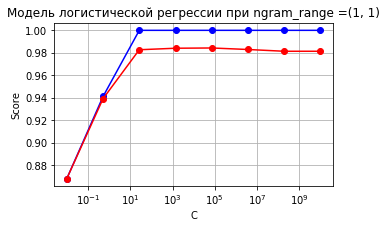

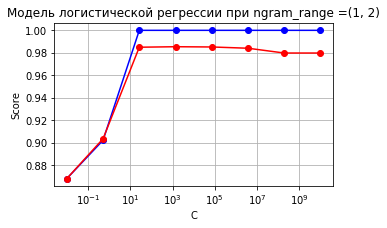

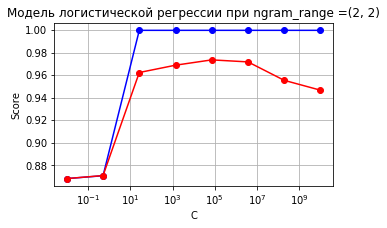

In [39]:
# Задача 2
# Обучите и протестируйте на разбитом обучающем подмножестве классификаторы со следующими параметрами:
# логистическая регрессия
# cs = np.logspace(-2, 10, 8, base=10)  # параметр регуляризации

cs = {"model__C": np.logspace(-2, 10, 8, base=10)}
logr_model = LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1,
                                solver="lbfgs", random_state=12345)

df_logr_results = task3_report(x_train, x_test, y_train, model = logr_model, params = cs, ngram_ranges = ngram_ranges, 
                              transformation_type = 'tfidf', x_scale = 'log', kf=kf, 
                              title = 'Модель логистической регрессии')

Наивный Байес (модель Бернулли) при ngram_range = (1, 1) :
Время обучения лучшей модели 0.04462999105453491 с
Время предсказания лучшей модели 0.013058650857142879 с
Лучший параметр модели alpha = 0.013894954943731374
Наибольшая доля правильных классификаций 0.9881139268894371
-------------------------------------
Наивный Байес (модель Бернулли) при ngram_range = (1, 2) :
Время обучения лучшей модели 0.17403459548950195 с
Время предсказания лучшей модели 0.031477357142857244 с
Лучший параметр модели alpha = 0.0001
Наибольшая доля правильных классификаций 0.9858712715855573
-------------------------------------
Наивный Байес (модель Бернулли) при ngram_range = (2, 2) :
Время обучения лучшей модели 0.10222691297531128 с
Время предсказания лучшей модели 0.021978068571429178 с
Лучший параметр модели alpha = 0.002682695795279727
Наибольшая доля правильных классификаций 0.9809374299170217
-------------------------------------


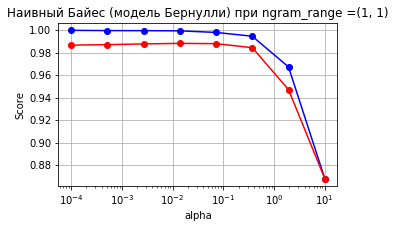

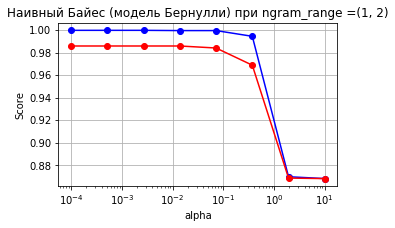

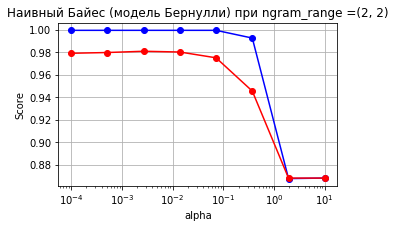

In [40]:
# Задача 2
# Обучите и протестируйте на разбитом обучающем подмножестве классификаторы со следующими параметрами:
# Наивный Байес: модель Бернулли
# alphas = np.logspace(-4, 1, 8, base=10)  # сглаживающий параметр

alphas = {"model__alpha": np.logspace(-4, 1, 8, base=10)}
bernNB_model = BernoulliNB(binarize=None)

df_bernNB_results = task3_report(x_train, x_test, y_train, model = bernNB_model, params = alphas, ngram_ranges = ngram_ranges, 
                                 transformation_type = 'binary', x_scale = 'log', kf=kf, 
                                 title = 'Наивный Байес (модель Бернулли)')

Наивный Байес (мультиномиальная модель) при ngram_range = (1, 1) :
Время обучения лучшей модели 0.04612529277801514 с
Время предсказания лучшей модели 0.013336367714285789 с
Лучший параметр модели alpha = 0.07196856730011521
Наибольшая доля правильных классификаций 0.9838528818120655
-------------------------------------
Наивный Байес (мультиномиальная модель) при ngram_range = (1, 2) :
Время обучения лучшей модели 0.13538795709609985 с
Время предсказания лучшей модели 0.023204125714286355 с
Лучший параметр модели alpha = 0.013894954943731374
Наибольшая доля правильных классификаций 0.9865440681767212
-------------------------------------
Наивный Байес (мультиномиальная модель) при ngram_range = (2, 2) :
Время обучения лучшей модели 0.12254977226257324 с
Время предсказания лучшей модели 0.019845934285714455 с
Лучший параметр модели alpha = 0.013894954943731374
Наибольшая доля правильных классификаций 0.9800403677954699
-------------------------------------


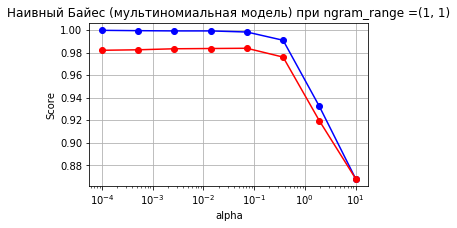

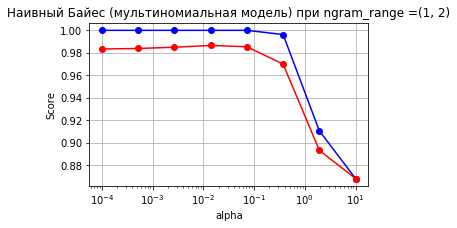

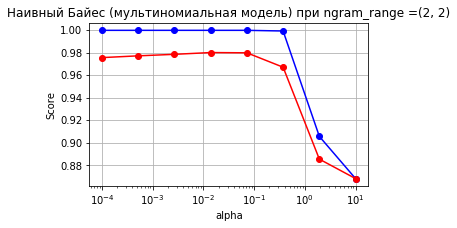

In [41]:
# Задача 2
# Обучите и протестируйте на разбитом обучающем подмножестве классификаторы со следующими параметрами:
# Наивный Байес: мультиномиальная модель
# alphas = np.logspace(-4, 1, 8, base=10)  # сглаживающий параметр

alphas = {"model__alpha": np.logspace(-4, 1, 8, base=10)}
multNB_model = MultinomialNB()

df_multNB_results = task3_report(x_train, x_test, y_train, model = multNB_model, params = alphas, ngram_ranges = ngram_ranges, 
                                 transformation_type = 'tfidf', x_scale = 'log', kf=kf, 
                                 title = 'Наивный Байес (мультиномиальная модель)')

In [42]:
# Задача 3.7
# Выведите итоговые данные по всем методам для лучших моделей 
# (метод, n-gram, значение параметра модели, время обучения, время предсказания, доля правильных классификаций)

df_summary = pd.concat([df_knn_results, df_logr_results, df_bernNB_results, df_multNB_results], axis=0)
df_summary.index=np.arange(0,len(df_summary))
df_summary

,Title,ngram_range,Changing parameter,best_parameter,best_score,time_best_model_fit,time_best_model_predict
0,Модель к-ближайших соседей,"(1, 1)",n_neighbors,21,0.95582,0.0618422,0.182337
1,Модель к-ближайших соседей,"(1, 2)",n_neighbors,21,0.962099,0.14237,0.195511
2,Модель к-ближайших соседей,"(2, 2)",n_neighbors,1,0.938103,0.108492,0.114573
3,Модель логистической регрессии,"(1, 1)",C,71968.6,0.984301,0.152842,0.012838
4,Модель логистической регрессии,"(1, 2)",C,1389.5,0.985423,0.498045,0.0279256
5,Модель логистической регрессии,"(2, 2)",C,71968.6,0.973537,0.42611,0.0214304
6,Наивный Байес (модель Бернулли),"(1, 1)",alpha,0.013895,0.988114,0.04463,0.0130587
7,Наивный Байес (модель Бернулли),"(1, 2)",alpha,0.0001,0.985871,0.174035,0.0314774
8,Наивный Байес (модель Бернулли),"(2, 2)",alpha,0.0026827,0.980937,0.102227,0.0219781
9,Наивный Байес (мультиномиальная модель),"(1, 1)",alpha,0.0719686,0.983853,0.0461253,0.0133364


In [43]:
# Задача 3.8
# Сделайте выводы по полученным результатам (преимущества и недостатки методов)

In [44]:
# посмотрим на количество правильных классификаций модели
df_summary.sort_values(by=['best_score'], ascending=False)

,Title,ngram_range,Changing parameter,best_parameter,best_score,time_best_model_fit,time_best_model_predict
6,Наивный Байес (модель Бернулли),"(1, 1)",alpha,0.013895,0.988114,0.04463,0.0130587
10,Наивный Байес (мультиномиальная модель),"(1, 2)",alpha,0.013895,0.986544,0.135388,0.0232041
7,Наивный Байес (модель Бернулли),"(1, 2)",alpha,0.0001,0.985871,0.174035,0.0314774
4,Модель логистической регрессии,"(1, 2)",C,1389.5,0.985423,0.498045,0.0279256
3,Модель логистической регрессии,"(1, 1)",C,71968.6,0.984301,0.152842,0.012838
9,Наивный Байес (мультиномиальная модель),"(1, 1)",alpha,0.0719686,0.983853,0.0461253,0.0133364
8,Наивный Байес (модель Бернулли),"(2, 2)",alpha,0.0026827,0.980937,0.102227,0.0219781
11,Наивный Байес (мультиномиальная модель),"(2, 2)",alpha,0.013895,0.98004,0.12255,0.0198459
5,Модель логистической регрессии,"(2, 2)",C,71968.6,0.973537,0.42611,0.0214304
1,Модель к-ближайших соседей,"(1, 2)",n_neighbors,21,0.962099,0.14237,0.195511


Выводы: <br>

  <li>Наивный Байсовский классификатор показывает лучшие результаты</li>
  <li>Худшие результаты классификации однозначно показывает модель к-ближайших соседей</li>

In [45]:
# посмотрим на время предсказаний
df_summary.sort_values(by=['time_best_model_predict'], ascending=True)

,Title,ngram_range,Changing parameter,best_parameter,best_score,time_best_model_fit,time_best_model_predict
3,Модель логистической регрессии,"(1, 1)",C,71968.6,0.984301,0.152842,0.012838
6,Наивный Байес (модель Бернулли),"(1, 1)",alpha,0.013895,0.988114,0.04463,0.0130587
9,Наивный Байес (мультиномиальная модель),"(1, 1)",alpha,0.0719686,0.983853,0.0461253,0.0133364
11,Наивный Байес (мультиномиальная модель),"(2, 2)",alpha,0.013895,0.98004,0.12255,0.0198459
5,Модель логистической регрессии,"(2, 2)",C,71968.6,0.973537,0.42611,0.0214304
8,Наивный Байес (модель Бернулли),"(2, 2)",alpha,0.0026827,0.980937,0.102227,0.0219781
10,Наивный Байес (мультиномиальная модель),"(1, 2)",alpha,0.013895,0.986544,0.135388,0.0232041
4,Модель логистической регрессии,"(1, 2)",C,1389.5,0.985423,0.498045,0.0279256
7,Наивный Байес (модель Бернулли),"(1, 2)",alpha,0.0001,0.985871,0.174035,0.0314774
2,Модель к-ближайших соседей,"(2, 2)",n_neighbors,1,0.938103,0.108492,0.114573


Выводы: <br>
  <li>Наиболее быстрой является модель логистической регрессии</li>
  <li>Наивный байсовский классификатор также показывает хорошие результаты</li>
  <li>Самой медленной для предсказания является модель к-ближайших соседей</li>

In [46]:
# посмотрим на время обучения
df_summary.sort_values(by=['time_best_model_fit'], ascending=True)

,Title,ngram_range,Changing parameter,best_parameter,best_score,time_best_model_fit,time_best_model_predict
6,Наивный Байес (модель Бернулли),"(1, 1)",alpha,0.013895,0.988114,0.04463,0.0130587
9,Наивный Байес (мультиномиальная модель),"(1, 1)",alpha,0.0719686,0.983853,0.0461253,0.0133364
0,Модель к-ближайших соседей,"(1, 1)",n_neighbors,21,0.95582,0.0618422,0.182337
8,Наивный Байес (модель Бернулли),"(2, 2)",alpha,0.0026827,0.980937,0.102227,0.0219781
2,Модель к-ближайших соседей,"(2, 2)",n_neighbors,1,0.938103,0.108492,0.114573
11,Наивный Байес (мультиномиальная модель),"(2, 2)",alpha,0.013895,0.98004,0.12255,0.0198459
10,Наивный Байес (мультиномиальная модель),"(1, 2)",alpha,0.013895,0.986544,0.135388,0.0232041
1,Модель к-ближайших соседей,"(1, 2)",n_neighbors,21,0.962099,0.14237,0.195511
3,Модель логистической регрессии,"(1, 1)",C,71968.6,0.984301,0.152842,0.012838
7,Наивный Байес (модель Бернулли),"(1, 2)",alpha,0.0001,0.985871,0.174035,0.0314774


Выводы: <br>
  <li>Наиболее быстрыми являются наивные байесовские модели</li>
  <li>Модели к-ближайших соседей также быстро обучаются</li>
  <li>Наиболее медленной для обучения является модель логистической регрессии</li>

Вывод о лучшей модели: <br>
Лучшим является наивный байесовский классификатор с моделью Бернулли при n_gram = (1, 1) так как: <br>
  <li>занимает первое место по точности классификаций</li>
  <li>занимает первое место по скорости обучения </li>
  <li>занимает второе место по скорости предсказания, но не сильно уступает лидеру </li>